In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('~/Desktop/train_spam.csv')
train_data

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...
...,...,...
16273,spam,if you are interested in binary options tradin...
16274,spam,dirty pictureblyk on aircel thanks you for bei...
16275,ham,or you could do this g on mon 1635465 sep 1635...
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...


In [262]:
!pip install pymorphy2
!pip install catboost

In [263]:
train['text_type'].value_counts()

text_type
0    11469
1     4809
Name: count, dtype: int64

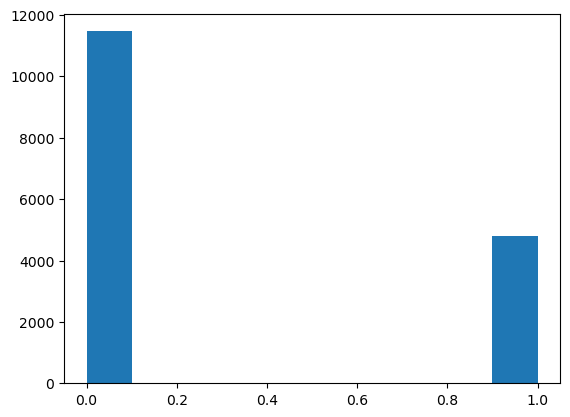

In [264]:
plt.hist(train['text_type']);

In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=0650d225b6bf652ccfb229bdb9c43dbdc04f4e886a4415d8f9a4c99a25230e37
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [15]:
import nltk
import pymorphy2
import string
from nltk.corpus import stopwords
import re
from tqdm import tqdm_notebook
nltk.download('stopwords')
nltk.download('punkt')

def preprop_text(text):
    nums_filtered_text = re.sub(r'[0-9]+', '', text.lower())
    punct_filtered_text = ''.join([ch for ch in nums_filtered_text if ch not in string.punctuation])
    tokens = nltk.WordPunctTokenizer().tokenize(punct_filtered_text)
    filtr_stop_words_tokens = [pymorphy2.MorphAnalyzer().parse(token)[0].normal_form for token in tokens
                             if token not in set(stopwords.words('english'))]
    
    norm_tokens = [pymorphy2.MorphAnalyzer().parse(token)[0].normal_form for token in filtr_stop_words_tokens]

    return f"{' '.join(norm_tokens)}"

from nltk.tokenize import word_tokenize,sent_tokenize
sent_ham = []
sent_spam = []

from tqdm import tqdm_notebook
for sentence in tqdm_notebook(train_data[train_data['text_type'] == 'ham']['text']):
  sent_ham.extend(
      [x.lower() for x in word_tokenize(re.sub(r'[0-9]+', '', sentence.lower()),language = 'english') if x not in set(stopwords.words('english'))]
  )

for sentence in tqdm_notebook(train_data[train_data['text_type'] == 'spam']['text']):
  sent_spam.extend(
      [x.lower() for x in word_tokenize(re.sub(r'[0-9]+', '', sentence.lower()),language = 'english') if x.lower() not in set(stopwords.words('english'))]
  )

from collections import Counter
chars_ham = Counter()
chars_spam = Counter()

for sentence in tqdm_notebook(sent_ham):
    chars_ham[sentence] += 1

for sentence in tqdm_notebook(sent_spam):
    chars_spam[sentence] += 1


[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/vg/9vbx0cqs3yqc931qqxhhx08m0000gn/T/ipykernel_10437/2695937269.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sentence in tqdm_notebook(train_data[train_data['text_type'] == 'ham']['text']):


  0%|          | 0/11469 [00:00<?, ?it/s]

/var/folders/vg/9vbx0cqs3yqc931qqxhhx08m0000gn/T/ipykernel_10437/2695937269.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sentence in tqdm_notebook(train_data[train_data['text_type'] == 'spam']['text']):


  0%|          | 0/4809 [00:00<?, ?it/s]

/var/folders/vg/9vbx0cqs3yqc931qqxhhx08m0000gn/T/ipykernel_10437/2695937269.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sentence in tqdm_notebook(sent_ham):


  0%|          | 0/376277 [00:00<?, ?it/s]

/var/folders/vg/9vbx0cqs3yqc931qqxhhx08m0000gn/T/ipykernel_10437/2695937269.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sentence in tqdm_notebook(sent_spam):


  0%|          | 0/165832 [00:00<?, ?it/s]

<BarContainer object of 20 artists>

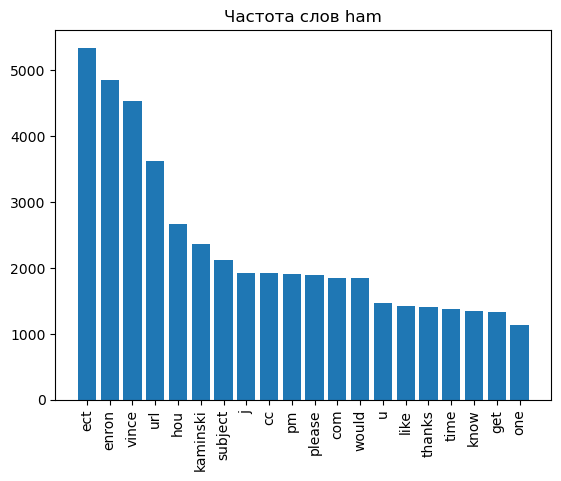

In [269]:
plt.title('Частота слов ham')
co_ham = pd.DataFrame(index = ['word','count'],data = [chars_ham.keys(),chars_ham.values()]).T.sort_values('count',ascending = False)[:20]

plt.xticks(rotation = 90)
plt.bar(co_ham['word'],co_ham['count'])

<BarContainer object of 20 artists>

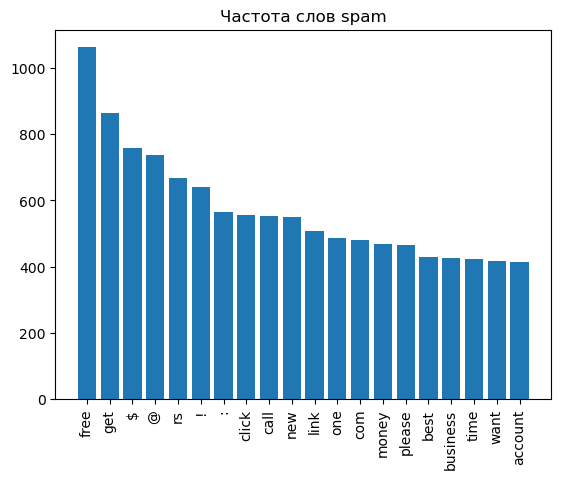

In [270]:
plt.title('Частота слов spam')
co_spam = pd.DataFrame(index = ['word','count'],data = [chars_spam.keys(),chars_spam.values()]).T.sort_values('count',ascending = False)[:20]

plt.xticks(rotation = 90)
plt.bar(co_spam['word'],co_spam['count'])

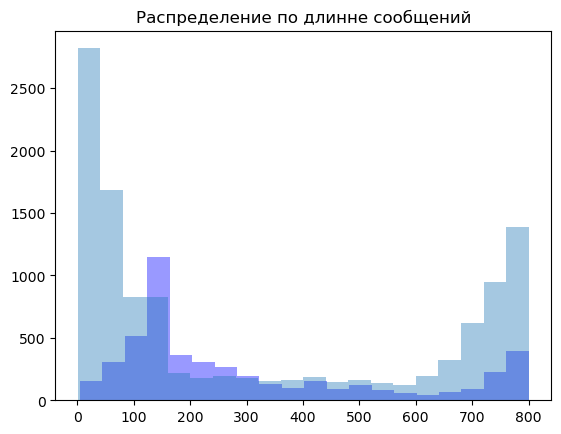

In [273]:
plt.title('Распределение по длинне сообщений')
plt.hist(train_data[train_data['text_type'] == 'spam']['text'].apply(lambda x: len(x)),bins = 20,color = 'b',alpha = 0.4);
plt.hist(train_data[train_data['text_type'] == 'ham']['text'].apply(lambda x: len(x)),alpha = 0.4,bins = 20);

In [279]:
def preprop_text(text):
    nums_filtered_text = re.sub(r'[0-9]+', '', text.lower())
    punct_filtered_text = ''.join(
        [ch for ch in nums_filtered_text if ch not in string.punctuation]
    )
    tokens = word_tokenize(punct_filtered_text)
    filtr_stop_words_tokens = [token for token in tokens
                             if token not in set(stopwords.words('english'))]
    norm_tokens = [pos_tag([token])[0][0] for token in filtr_stop_words_tokens]

    return f"{' '.join(norm_tokens)}"

for i in tqdm_notebook(range(len(train_data))):
  train_data.iloc[i]['text'] = preprop_text(train_data.iloc[i]['text'])

y = train_data['text_type']
x = train_data['text']

from sklearn.model_selection import train_test_split
train_texts, test_texts, train_labels, test_labels = train_test_split(x,y,test_size = 0.3, random_state = 101)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
vectorizer = TfidfVectorizer()
log = LogisticRegression(max_iter = 1000,class_weight = 'balanced')

param_grid = {
    'vectorizer__max_features': [1000,5000,10000,30000],
    'vectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'log__C': np.arange(0.001,10)
}

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('vectorizer', vectorizer),
                  ('log', log)])

from sklearn.model_selection import StratifiedKFold,GridSearchCV
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)

grid_search = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    cv = stratified_kfold,
    scoring = "roc_auc",
    verbose = 2,
    n_jobs = -1
)

grid_search.fit(train_texts, train_labels)

from sklearn.metrics import roc_auc_score
test_pred = grid_search.best_estimator_.predict_proba(test_texts)[:, 1]
roc_auc_val = roc_auc_score(test_labels, test_pred)
print("roc-auc tf/log:", roc_auc_val)

/var/folders/vg/9vbx0cqs3yqc931qqxhhx08m0000gn/T/ipykernel_5564/3295765730.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(train_data))):


  0%|          | 0/16278 [00:00<?, ?it/s]

Fitting 5 folds for each of 120 candidates, totalling 600 fits
roc-auc tf/log: 0.9820446787727317


In [2]:
train_data['text_type'] = train_data['text_type'].apply(lambda x: 0 if x == 'ham' else 1)
train_data

,text_type,text
0,0,make sure alex knows his birthday is over in f...
1,0,a resume for john lavorato thanks vince i will...
2,1,plzz visit my website moviesgodml to get all m...
3,1,urgent your mobile number has been awarded wit...
4,0,overview of hr associates analyst project per ...
...,...,...
16273,1,if you are interested in binary options tradin...
16274,1,dirty pictureblyk on aircel thanks you for bei...
16275,0,or you could do this g on mon 1635465 sep 1635...
16276,0,insta reels par 80 गंद bhara pada hai 👀 kuch b...


In [20]:
!pip install pymorphy2

In [46]:
ENGLISH_STOP_WORDS = set(stopwords.words('english'))
PUNCT_WORD_TOKENIZER = nltk.WordPunctTokenizer()

In [48]:
import torch
import nltk
import string
import torch.nn as nn
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('stopwords')
nltk.download('punkt')

train_data = pd.read_csv('~/Desktop/train_spam.csv')

train_data['text_type'] = train_data['text_type'].apply(lambda x: 0 if x == 'ham' else 1)

def preprop_text(text):
    nums_filtered_text = re.sub(r'[0-9]+', '', text.lower())
    punct_filtered_text = ''.join(
        [ch for ch in nums_filtered_text if ch not in string.punctuation]
    )
    tokens = word_tokenize(punct_filtered_text)
    filtr_stop_words_tokens = [token for token in tokens
                             if token not in ENGLISH_STOP_WORDS]
    norm_tokens = [pos_tag([token])[0][0] for token in filtr_stop_words_tokens]

    return f"{' '.join(norm_tokens)}"

device = 'cuda' if torch.cuda.is_available() else 'cpu'

from transformers import BertTokenizer,BertModel,DistilBertTokenizer,DistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
embedder_bert = BertModel.from_pretrained('bert-base-cased').to(device)
embedder_bert.pooler = nn.Identity()
del embedder_bert.encoder.layer[:]

def length_to_mask(length, max_len=None, dtype=None):
    assert len(length.shape) == 1, 'Length shape should be 1 dimensional.'
    max_len = max_len or length.max().item()
    mask = torch.arange(max_len, device=length.device, dtype=length.dtype).expand(len(length), max_len) < length.unsqueeze(1)

    if dtype is not None:
        mask = torch.as_tensor(mask, dtype=dtype, device=length.device)
    return mask


[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
from torch.utils.data import Dataset,DataLoader

class dataset(Dataset):
  def __init__(self, hug_dataset, tokenizer, embedder=None, device=device):
    self.hug_dataset = hug_dataset
    self.tokenizer = tokenizer
    self.embedder = embedder
    self.device = device

  def __getitem__(self, idx):
    item_dict = self.hug_dataset.iloc[idx]
    text = item_dict['text']
    normalized_text = preprop_text(text)
    target = item_dict['text_type']

    token_ids = self.text_to_tokens_ids(normalized_text)
    tokens_text_len = len(token_ids)

    if self.embedder:
        return self.embedder(token_ids.unsqueeze(0)), target, tokens_text_len

    return token_ids, target

  def text_to_tokens_ids(self, text):
    tokens = self.tokenizer.tokenize(text)

    return torch.tensor(self.tokenizer.convert_tokens_to_ids(tokens)).to(device)

  def __len__(self):
    return len(self.hug_dataset)

In [50]:
from torch.nn.utils.rnn import pad_sequence

from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(train_data,test_size = 0.3,random_state = 101)

def collate_batch_functional(batch):
  targets_list, embeddings_list, lengths_list = [], [], []

  for (_embed_output, _target) in batch:
    targets_list.append(_target)
    embeddings_list.append(_embed_output)

  targets_tensor = torch.tensor(targets_list,dtype = torch.int64).to(device)
  embeddings_tensor = pad_sequence(embeddings_list, batch_first=True, padding_value = 0).to(device)

  return embeddings_tensor.detach(), targets_tensor.detach()

train_dataset = dataset(train_data, tokenizer = tokenizer)
test_dataset = dataset(test_data, tokenizer = tokenizer)

train_dataloader = DataLoader(train_dataset,batch_size = 32, shuffle = True, collate_fn = collate_batch_functional, drop_last = True)
test_dataloader = DataLoader(test_dataset,batch_size = 32, shuffle = False, collate_fn = collate_batch_functional, drop_last = True)

In [51]:
from transformers import DistilBertConfig
config = DistilBertConfig(hidden_size = 768,dropout = 0.1,num_labels = 2,num_hidden_layers = 12, num_attention_heads = 12, intermediate_size = 3072)

class DistilBertForSequenceClassification(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.num_labels = config.num_labels

        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.pre_classifier = nn.Linear(config.hidden_size, config.hidden_size)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        self.dropout = nn.Dropout(config.seq_classif_dropout)

        nn.init.xavier_normal_(self.classifier.weight)

    def forward(self, input_ids = None, attention_mask = None, head_mask = None, labels = None):
        distilbert_output = self.distilbert(input_ids=input_ids,
                                            attention_mask=attention_mask,
                                            head_mask=head_mask)
        
        hidden_state = distilbert_output[0]                    
        pooled_output = hidden_state[:, 0]                   
        pooled_output = self.pre_classifier(pooled_output)   
        pooled_output = nn.Tanh()(pooled_output)             
        pooled_output = self.dropout(pooled_output)        
        logits = self.classifier(pooled_output) 
        return logits

In [54]:
import torch.optim as optim
from tqdm import tqdm_notebook

y = train_data['text_type']
x = train_data['text']

from sklearn.utils import compute_class_weight
classes = np.unique(train_data['text_type'])
weight = compute_class_weight(y = y,class_weight = 'balanced',classes = classes)

weight_tensor = torch.FloatTensor(weight).to(device)

model = DistilBertForSequenceClassification(config).to(device)
loss_fn = torch.nn.CrossEntropyLoss(weight = weight_tensor)
optimizer = optim.Adam(model.parameters(), lr = 0.01)


for epoch in range(1):
    model.train()
    train_acc, total_train = 0, 0
    for i, (input_data, labels) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        input_data = input_data.to(device)
        labels = labels.to(device).long()
        outputs = model(input_data)

        loss = loss_fn(outputs.float(),labels)

        _,pred = torch.max(outputs, 1)
        total_train += labels.shape[0]
        train_acc += (pred == labels).sum().item()

        from sklearn.metrics import f1_score
        f1_train = f1_score(labels.cpu(), pred.cpu(), average='weighted')

        from sklearn.metrics import roc_auc_score

        try:
            roc_auc_train = roc_auc_score(labels.cpu(), pred.cpu())
        except ValueError:
            pass

        if i % 30 == 0:
            print('Epoch {} | Step {} | Train Loss: {:.4f} | Train Acc: {:.4f} | Train F1: {:.4f} | Train ROC: {:.4f}'.format(epoch, i, loss.item(), train_acc / total_train, f1_train,roc_auc_train))

        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        test_acc, total_test = 0, 0
        for i, (input_data, labels, lengths) in enumerate(tqdm_notebook(test_dataloader)):
            mask = length_to_mask(lengths)

            input_data = input_data.to(device)
            labels = labels.to(device).long()
            outputs, attention = model(input_data, mask=mask)
            _, pred = torch.max(outputs, 1)

            total_test += labels.shape[0]
            test_acc += (pred == labels).sum().item()

            f1_test = f1_score(labels.cpu(), pred.cpu(), average='weighted')

            try:
                roc_auc_test = roc_auc_score(labels.cpu(), pred.cpu())
            except ValueError:
                pass

            if i % 30 == 0:
                print('Epoch {} | Step {} | Test Loss: {:.4f} | Test Acc: {:.4f} | Test F1: {:.4f} | Test ROC: {:.4f}'.format(epoch, i, loss.item(), test_acc / total_test, f1_test,roc_auc_test))

/var/folders/vg/9vbx0cqs3yqc931qqxhhx08m0000gn/T/ipykernel_10437/241201039.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, (input_data, labels) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 0 | Step 0 | Train Loss: 0.7296 | Train Acc: 0.3438 | Train F1: 0.3547 | Train ROC: 0.4771
Epoch 0 | Step 30 | Train Loss: 1.0783 | Train Acc: 0.4970 | Train F1: 0.5048 | Train ROC: 0.4762
Epoch 0 | Step 60 | Train Loss: 1.2331 | Train Acc: 0.5061 | Train F1: 0.4424 | Train ROC: 0.5000


KeyboardInterrupt: 

При обучении BERT не удалось найти подходящую архитектуру (наблюдался прыгающий loss и слабая сходимость модели). Я также попробовал Transformer, но метрики были неудовлетворительными, поэтому я перешёл на Trainer.

In [56]:
train_data = pd.read_csv('~/Desktop/train_spam.csv')

def preprop_text(text):
    nums_filtered_text = re.sub(r'[0-9]+', '', text.lower())
    punct_filtered_text = ''.join(
        [ch for ch in nums_filtered_text if ch not in string.punctuation]
    )
    tokens = word_tokenize(punct_filtered_text)
    filtr_stop_words_tokens = [token for token in tokens
                             if token not in set(stopwords.words('english'))]
    norm_tokens = [pos_tag([token])[0][0] for token in filtr_stop_words_tokens]

    return f"{' '.join(norm_tokens)}"

train_data['text_type'] = train_data['text_type'].apply(lambda x: 0 if x == 'ham' else 1)

from tqdm import tqdm_notebook
from datasets import Dataset

for i in tqdm_notebook(range(len(train_data))):
  train_data.iloc[i]['text'] = preprop_text(train_data.iloc[i]['text'])

#train_data['text'] = train_data['text'].apply(lambda x: preprop_text(x))

/var/folders/vg/9vbx0cqs3yqc931qqxhhx08m0000gn/T/ipykernel_10437/642641783.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(train_data))):


  0%|          | 0/16278 [00:00<?, ?it/s]

/var/folders/vg/9vbx0cqs3yqc931qqxhhx08m0000gn/T/ipykernel_10437/642641783.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.iloc[i]['text'] = preprop_text(train_data.iloc[i]['text'])


In [57]:
x = train_data['text']
y = train_data['text_type']

from sklearn.model_selection import train_test_split
train_texts, test_texts, train_labels, test_labels = train_test_split(x,y,test_size = 0.3, random_state = 101)

train_dataset = Dataset.from_pandas(
    pd.DataFrame({"text": train_texts, "label": train_labels})
)
val_dataset = Dataset.from_pandas(
    pd.DataFrame({"text": test_texts, "label": test_labels})
)

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize(batch):
    return tokenizer(batch["text"],padding = "max_length",truncation = True,max_length = 128)

train_dataset = train_dataset.map(tokenize, batched = True)
val_dataset = val_dataset.map(tokenize, batched = True)

train_dataset.set_format("torch", columns = ["input_ids", "attention_mask", "label"])
val_dataset.set_format("torch", columns = ["input_ids", "attention_mask", "label"])

Map:   0%|          | 0/11394 [00:00<?, ? examples/s]

Map:   0%|          | 0/4884 [00:00<?, ? examples/s]

In [58]:
from transformers import DistilBertForSequenceClassification,TrainingArguments,Trainer
from sklearn.metrics import roc_auc_score

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased",num_labels= 2)

training_args = TrainingArguments(
    num_train_epochs = 3,
    per_device_train_batch_size = 32,
    per_device_eval_batch_size = 32,
    warmup_steps = 550,
    weight_decay = 0.05,
    output_dir = './noth'
)

trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset = val_dataset,
    compute_metrics = lambda pred: {
        "roc_auc": roc_auc_score(test_labels, pred.predictions[:,1])
    }
)

trainer.train()
print("roc-auc:", trainer.evaluate()["eval_roc_auc"])

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/admin/anaconda3/lib/python3.11/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss
500,0.228800
1000,0.052000


roc-auc: 0.9951825880290318
